<a href="https://colab.research.google.com/github/malikalnser/sentiment_analysis_keras_tensoflow-2/blob/main/sentiment_analysis_keras_tensoflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Conv1D
from keras.layers import LSTM

In [ ]:
from google.colab import files
# uploaded = files.upload()

In [ ]:
import io
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
# def data_preprocess(data):
#   # define and remove tags
#   tag_pattern = re.compile(r'<[^>]+>')
#   data = re.sub(tag_pattern,'', data)

#   # remove anything but letters
#   data = re.sub('[^A-Za-z]', ' ', data)

#   #remove single charater (letter surrounded by white space)
#   data = re.sub(r's+[A-Za-z]\s+', ' ', data)

#   #remove multiple whitespaces
#   data = re.sub(r'\s+', ' ', data)
  
#   return data

In [ ]:
# looping through firt column in dataset
# processing our data and adding to list
X = []
sentences = data['review']
for sentence in sentences:
  X.append(preprocess_text(sentence))

In [ ]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [ ]:
# repalce words label with number
y = data['sentiment']

y = np.array(list(map(lambda y: 1 if y=='positive' else 0, y)))

In [ ]:
y[0]

1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
dict_size = 5000
# tokenizer
tokenier = Tokenizer(dict_size)

# something we have to do before next
tokenier.fit_on_texts(X_train)

# turns train text into indexes
X_train = tokenier.texts_to_sequences(X_train)

# turns test text into indexes
X_test = tokenier.texts_to_sequences(X_test)

In [ ]:
X_train[:3]

[[9,
  43,
  786,
  2121,
  524,
  299,
  1,
  104,
  1860,
  1989,
  4281,
  2,
  782,
  4786,
  9,
  1,
  224,
  1,
  77,
  763,
  51,
  49,
  17,
  97,
  3,
  1,
  24,
  1968,
  98,
  31,
  23,
  32,
  116,
  1101,
  9,
  6,
  5,
  2323,
  1163,
  4,
  449,
  43,
  540,
  4,
  88,
  28,
  20,
  37,
  892,
  397,
  13,
  1,
  154,
  4,
  2935,
  22,
  4318,
  18,
  2897,
  9,
  42,
  71,
  218,
  69,
  123,
  7,
  76,
  3100,
  193,
  18,
  232,
  2,
  1,
  427,
  198,
  4888,
  147,
  19,
  60,
  24,
  13,
  70,
  358,
  299,
  16,
  15,
  6,
  198,
  25,
  302,
  9,
  11,
  1,
  1820,
  112,
  413,
  2,
  11,
  1,
  1651,
  562,
  67,
  419,
  373,
  82,
  114,
  43,
  110,
  361,
  28,
  33,
  15,
  41,
  10,
  88,
  441,
  13,
  357,
  1145,
  59,
  7,
  1,
  460,
  214,
  992,
  4,
  4124,
  7,
  174,
  3,
  32,
  433,
  680,
  607,
  9,
  66,
  227,
  233,
  107,
  830,
  33,
  169,
  27,
  217,
  9,
  1,
  423,
  360,
  53,
  3696,
  273,
  157,
  1672,
  187,
  5,
  1,
  711,

In [ ]:
vocab_size = len(tokenier.word_index) + 1
max_len = 100
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

92547

In [ ]:
X_train[:3]

array([[   4,    1,  296,  140, 2854,    2,  405,  614,    1,  263,    5,
        3514,  977,    4,   25,   37,   11, 1237,  215,   62,    2,   35,
           5,   27,  217,   24,  189, 1430,    7, 1068,   15, 4868,   81,
           1,  221,   63,  351,   64,   52,   24,    4, 3547,   13,    6,
          19,  192,    4,  859, 3430, 1720,   17,   23,    4,  158,  194,
         175,  106,    9, 1604,  461,   71,  218,    4,  321,    2, 3431,
          31,   20,   47,   68, 1844, 4668,   11,    6, 1365,    8,   16,
           5, 3475, 1990,   14,   59,    1, 2380,  460,  518,    2,  170,
        2524, 2698, 1745,    4,  573,    6,   33,    1, 3750,  198,  345,
        3812],
       [   1,  412,  100,   20,  155,   81,   17,   46,   14,    1,   98,
        4696,    2, 2508, 1560,    2,    1,  864,    1,  100,  639,   51,
           7,    5,   19,  188,  403,    1,  546,    9,   21,    5, 4342,
          51,    7, 1810,  585,    4, 2408,  417,   33,    1,  296,   41,
        1264,   63,   1

In [ ]:
from google.colab import files
# uploaded2 = files.upload()

In [ ]:
glove_file = open('/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt', encoding='utf8')

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
# glove_file = open('E:/Datasets/Word Embeddings/glove.6B.100d.txt', encoding="utf8")

# build our feature matrix
for line in glove_file:
    records = line.split()
    # key is the first element in record (lines in globar vector file)
    word = records[0]
    # the rest of the recvord goes in as array (hence asarray :))
    vector_dimensions = asarray(records[1:], dtype='float32')
    # finally, we fill the dictionery with word as key (first elemnt in glove file lines)
    # and the rest of the line as it's value
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# define matrix of zeroes with rows equal to vocab size (length of word index)
# and colums equals to 100
embedding_matrix = zeros((vocab_size, 100))

# loop through word_index items
# vocab size varible means embedding_matrix has same size as word_index
for word, index in tokenier.word_index.items():
  # need to check with this again (what exactly is word in both collections)
    embedding_vector = embeddings_dictionary.get(word)
    # if word (looping thorugh word_index) exists in glove (embeddings_dictionary)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Word on Neural Network:
Simple NN: not much to tell about it, simple.

Convnoutal NN: works with 2D data, like images, but we can convert it to 1D to work with text.

Recurrent NN: Works with sequence of data which makes it great for working with text

Let's go!

Simple Neural Network:

In [ ]:
# define model
model = Sequential()

# define embedding layer: Embedding layer enables us to convert each word into a fixed length vector of defined size
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
#adding it
model.add(embedding_layer)

#adding flatten layer: Flattening is converting the data into a 1-dimensional array for inputting it to the next layer
model.add(Flatten())

#adding dense layer: a dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
# the guy also chose sigmoid activation function:
# An activation function in a neural network defines how the weighted sum of the input... 
# ...is transformed into an output from a node or nodes in a layer of the network.
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# optimizer: Optimizers are algorithms or methods used to change the attributes of the neural network
# such as weights and learning rate to reduce the losses
# loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
# metrics: A metric is a function that is used to judge the performance of your model.

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          9254700   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 9,264,701
Trainable params: 10,001
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
# this cell is where the training happens:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
# epoch: In an epoch, we use all of the data exactly once (cycle)
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data
# 0.2 means that 20% of the training data is used to find the training accuracy of the algorithm.

Epoch 1/6
250/250 [==============================] - 14s 5ms/step - loss: 0.6686 - acc: 0.6174 - val_loss: 0.5552 - val_acc: 0.7116
Epoch 2/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4993 - acc: 0.7578 - val_loss: 0.5382 - val_acc: 0.7254
Epoch 3/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4597 - acc: 0.7846 - val_loss: 0.5299 - val_acc: 0.7383
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4254 - acc: 0.8071 - val_loss: 0.5277 - val_acc: 0.7404
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4112 - acc: 0.8197 - val_loss: 0.5424 - val_acc: 0.7362
Epoch 6/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4005 - acc: 0.8260 - val_loss: 0.5468 - val_acc: 0.7345


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.5471 - acc: 0.7375


In [ ]:
# To check the test accuracy and loss, execute the following script:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5471360087394714
Test Accuracy: 0.737500011920929


Once you execute the above script, you will see that we get a test accuracy of 74.68%. Our training accuracy was 85.52%. This means that our model is overfitting on the training set. Overfitting occurs when your model performs better on the training set than the test set. Ideally, the performance difference between training and test sets should be minimum.



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Note on plotting:
# this is what histor.history looks like:
# {'acc': [0.7544062733650208,
#   0.8369062542915344,
#   0.8641562461853027,
#   0.8870624899864197,
#   0.8983749747276306,
#   0.9220312237739563],
#  'loss': [0.49604183435440063,
#   0.3705410063266754,
#   0.3204140067100525,
#   0.27911317348480225,
#   0.2528165876865387,
#   0.21523945033550262],
#  'val_acc': [0.8197500109672546,
#   0.8396250009536743,
#   0.8361250162124634,
#   0.8501250147819519,
#   0.8497499823570251,
#   0.8521249890327454],
#  'val_loss': [0.39696407318115234,
#   0.36161020398139954,
#   0.36183205246925354,
#   0.3399807810783386,
#   0.3386904299259186,

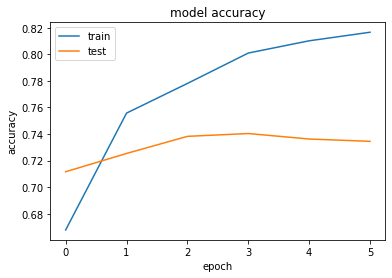

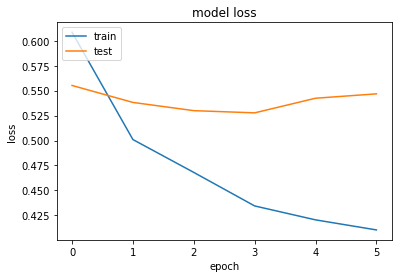

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

print('\n')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

why does the graph fluctuate??? es[ically at 2 and 4 epochs

In [ ]:
# Convolutional Neural Network:

In [ ]:
model = Sequential()

# typical stuff
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
model.add(embedding_layer)

# this is the convolutional part of cnn
# cnn is 2d (images) so we use 1D
# from docs: This layer creates a convolution kernel that is convolved with the layer
# input over a single spatial dimension to produce a tensor of outputs
model.add(Conv1D(128, 5, activation='relu'))

# Downsamples the input representation by taking the maximum value over the time dimension
model.add(GlobalMaxPooling1D())

# also typical stuff
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 9,318,957
Trainable params: 64,257
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 18s 67ms/step - loss: 0.5782 - acc: 0.6868 - val_loss: 0.3939 - val_acc: 0.8234
Epoch 2/6
250/250 [==============================] - 16s 66ms/step - loss: 0.3713 - acc: 0.8346 - val_loss: 0.3837 - val_acc: 0.8210
Epoch 3/6
250/250 [==============================] - 16s 66ms/step - loss: 0.3172 - acc: 0.8652 - val_loss: 0.3512 - val_acc: 0.8409
Epoch 4/6
250/250 [==============================] - 16s 66ms/step - loss: 0.2850 - acc: 0.8849 - val_loss: 0.3421 - val_acc: 0.8479
Epoch 5/6
250/250 [==============================] - 16s 65ms/step - loss: 0.2426 - acc: 0.9082 - val_loss: 0.3450 - val_acc: 0.8479
Epoch 6/6
250/250 [==============================] - 16s 64ms/step - loss: 0.2102 - acc: 0.9281 - val_loss: 0.3442 - val_acc: 0.8489


In [ ]:
history.history

{'acc': [0.754031240940094,
  0.8369374871253967,
  0.8658437728881836,
  0.8867499828338623,
  0.9047812223434448,
  0.9231874942779541],
 'loss': [0.49813833832740784,
  0.36818060278892517,
  0.3177762031555176,
  0.2787849009037018,
  0.24635633826255798,
  0.21527360379695892],
 'val_acc': [0.8233749866485596,
  0.8209999799728394,
  0.8408750295639038,
  0.8478749990463257,
  0.8478749990463257,
  0.8488749861717224],
 'val_loss': [0.3938951790332794,
  0.38365665078163147,
  0.351240873336792,
  0.3421289622783661,
  0.34495994448661804,
  0.34416574239730835]}

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.3458 - acc: 0.8456


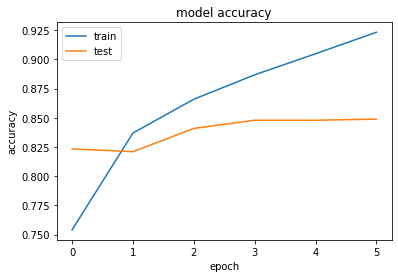

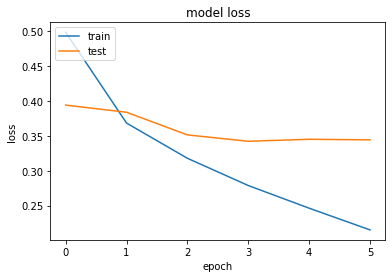

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

print('\n')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

Recurrent Neural Network (LSTM: long short-term memorey):

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
# I'm not sure what 128 stands for, articale says neurons
# however docs does not have that, they have units
# are units and neurons the same????????
# I need to check patamters
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,372,077
Trainable params: 117,377
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

print('\n')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

TODO: change the number of layers, number of neurons and activation functions for all three neural networks discussed in this article and see which neural network works best for you.